<a href="https://colab.research.google.com/github/rouaLagha/TP_Machine_Learning/blob/main/Exercice2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import pandas as pd

df = pd.read_csv("/content/DiseaseAndSymptoms.csv")

In [ ]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Identification des variables catégorielles
cat_columns = df.select_dtypes(include=['object']).columns

# Encodage des variables catégorielles
label_encoder = LabelEncoder()

for col in cat_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Affichage du DataFrame après encodage
print(df.head())


   Disease  Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5  Symptom_6  \
0       15         33         35         35         11         38         32   
1       15         24         27         18         50         38         32   
2       15         33         27         18         50         38         32   
3       15         33         35         18         50         38         32   
4       15         33         35         35         50         38         32   

   Symptom_7  Symptom_8  Symptom_9  Symptom_10  Symptom_11  Symptom_12  \
0         26         21         22          21          18          11   
1         26         21         22          21          18          11   
2         26         21         22          21          18          11   
3         26         21         22          21          18          11   
4         26         21         22          21          18          11   

   Symptom_13  Symptom_14  Symptom_15  Symptom_16  Symptom_17  
0         

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Disease'])
y = df['Disease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
# Prédictions sur l'ensemble de test
y_pred = svm_classifier.predict(X_test)

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # 'macro' pour moyenne non pondérée
recall = recall_score(y_test, y_pred, average='macro')

# Affichage des résultats
print(f'Exactitude (Accuracy): {accuracy:.4f}')
print(f'Précision (Precision): {precision:.4f}')
print(f'Reappel (Recall): {recall:.4f}')

# Optionnel: Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :")
print(conf_matrix)

Exactitude (Accuracy): 0.9736
Précision (Precision): 0.9759
Reappel (Recall): 0.9724
Matrice de confusion :
[[32  0  0 ...  0  0  0]
 [ 0 39  0 ...  0  0  0]
 [ 0  0 34 ...  0  0  0]
 ...
 [ 0  0  0 ... 36  0  0]
 [ 0  0  0 ...  0 37  0]
 [ 0  0  0 ...  0  0 39]]


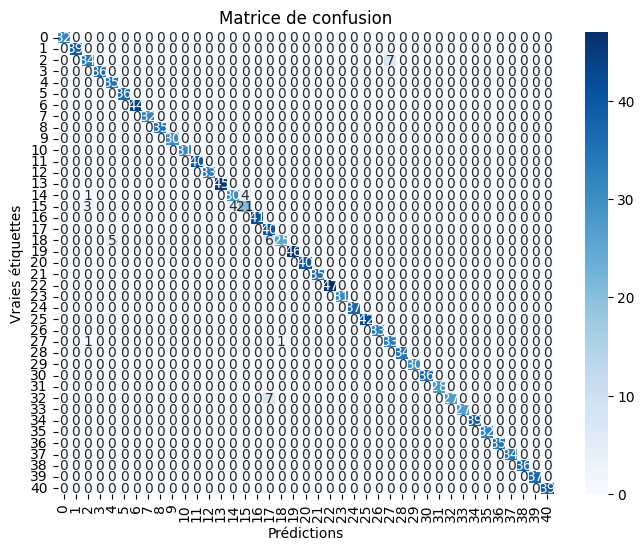

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Affichage de la matrice de confusion sous forme de graphique
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()